In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.utils import multi_runs
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
from OCP_algorithms import hospital_capacity_objective_solve, quadratic_objective_solve

from SIR_Plotting_Routines import *
import pysindy as ps
import glob
import pandas as pd


from os.path import basename
import os
import sys


cwd = os.path.dirname(os.path.abspath(''))
# sys.path.append(cwd + '/Cpp/build/Binders/')
import pyFROLS as pf

DATA_DIR = cwd + '/Cpp/data/'
FIGURE_DIR = cwd + '/../../figures/'

In [2]:
N_pop = 100
p_ER = 1
d_max = 1
N_output_max = 80
Nx = 3
Nu = 1
Nt = 50
er_model = pf.Polynomial_Model(Nx,Nu,N_output_max,d_max)
er_features = er_model.read_csv(DATA_DIR + 'ERR_Simulation_SIR_' + str(N_pop) + '_' + str(p_ER) + '/param.csv')
#er_model.feature_summary()


In [3]:
qr_model = pf.Polynomial_Model(Nx,Nu,N_output_max,d_max)
qr_features = qr_model.read_csv(DATA_DIR + 'Quantile_Simulation_SIR_' + str(N_pop) + '_' + str(p_ER) + '/param.csv')
# qr_model.feature_summary()

In [4]:
from pysindy_casadi_converter import construct_mx_equations
import casadi as cs


In [5]:
def load_SIR_trajectories():
    trajs = glob.glob(DATA_DIR + 'ERR_Simulation_SIR_' + str(N_pop) + '_' + str(p_ER) + '/trajectory*.csv')
    dfs = [pd.read_csv(traj) for traj in trajs[:100] if "Quantile" not in traj]
    
    print(dfs[0].columns)
    N_traj = len(dfs)
    X = [df[['S', 'I', 'R']].to_numpy() for df in dfs]
    U = [df['p_I'].to_numpy() for df in dfs]

    return X, U

X_sim, U_sim = load_SIR_trajectories()
#get mean of all X_sim
X_mean = np.mean(np.array(X_sim), axis=0)
U_mean = np.mean(np.array(U_sim), axis=0)

Index(['I', 'R', 'S', 'p_I', 't'], dtype='object')


In [6]:
Wu = 100000
t = range(0, Nt)

Nx = X_mean.shape[1]
Nu = 1
xk = cs.MX.sym('X', Nx)
uk = cs.MX.sym('U', Nu)
eqs = cs.vertcat(*construct_mx_equations(xk, uk, qr_model, qr_features))
qr_F = cs.Function('F', [xk, uk], [eqs])

eqs = cs.vertcat(*construct_mx_equations(xk, uk, er_model, er_features))
er_F = cs.Function('F', [xk, uk], [eqs])

(qr_sol, qr_X, qr_U) = quadratic_objective_solve(X_mean, U_mean, Wu, qr_F, Nt)
(er_sol, er_X, er_U) = quadratic_objective_solve(X_mean, U_mean, Wu, er_F, Nt)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1275

Total number of variables............................:       50
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       50
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality co

In [7]:

er_sims = pf.Bernoulli_SIR_MC_Simulations(N_pop, p_ER, 100, list(er_U[0]))
qr_sims = pf.Bernoulli_SIR_MC_Simulations(N_pop, p_ER, 100, list(qr_U[0]))
er_X_list = [np.array([x[0], x[1], x[2]]) for x in er_sims]
qr_X_list = [np.array([x[0], x[1], x[2]]) for x in qr_sims]

size: 32
Simulation 0 of 100
Simulation 10 of 100
Simulation 20 of 100
Simulation 30 of 100
Simulation 40 of 100
Simulation 50 of 100
Simulation 60 of 100
Simulation 70 of 100
Simulation 80 of 100
Simulation 90 of 100
size: 32
Simulation 0 of 100
Simulation 10 of 100
Simulation 20 of 100
Simulation 30 of 100
Simulation 40 of 100
Simulation 50 of 100
Simulation 60 of 100
Simulation 70 of 100
Simulation 80 of 100
Simulation 90 of 100


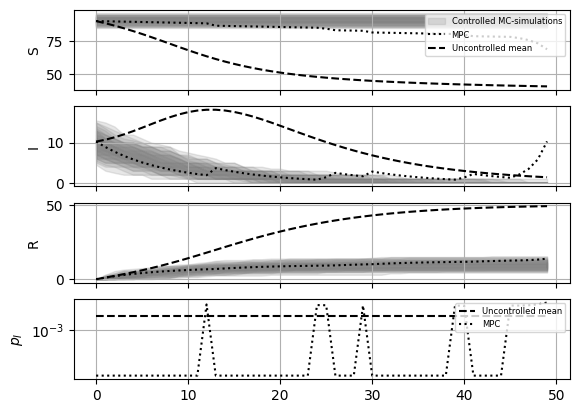

In [8]:

fig, ax = plt.subplots(4)

plot_sim_comparison_SIR(ax, er_X_list, X_mean, U_mean, er_X, er_U, t)

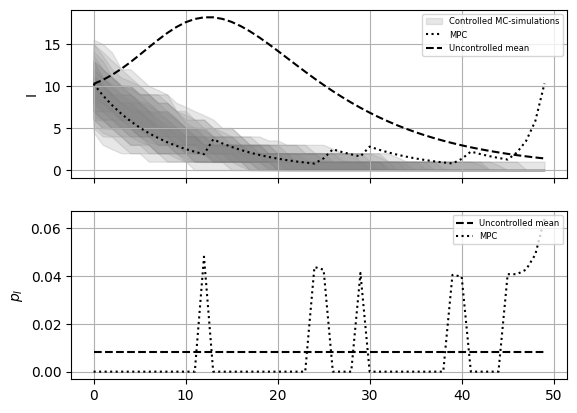

In [9]:
fig, ax = plt.subplots(2)
plot_sim_comparison_I(ax, er_X_list, X_mean, U_mean, er_X, er_U, t)

In [10]:
er_U

array([[9.90212614e-07, 9.90289060e-07, 9.90383569e-07, 9.90490732e-07,
        9.90598290e-07, 9.90690079e-07, 9.90753251e-07, 9.90784134e-07,
        9.90787790e-07, 9.90773179e-07, 9.90748775e-07, 9.90720682e-07,
        4.79263955e-02, 9.90787374e-07, 9.90797512e-07, 9.90790204e-07,
        9.90772642e-07, 9.90750346e-07, 9.90726917e-07, 9.90704435e-07,
        9.90683954e-07, 9.90665908e-07, 9.90650379e-07, 9.90637264e-07,
        4.36380721e-02, 4.25084167e-02, 9.90662788e-07, 9.90660057e-07,
        9.90653438e-07, 4.11540101e-02, 9.90701034e-07, 9.90712393e-07,
        9.90715794e-07, 9.90714016e-07, 9.90709246e-07, 9.90703054e-07,
        9.90696493e-07, 9.90690230e-07, 9.90684661e-07, 4.03598416e-02,
        3.96348736e-02, 9.90745849e-07, 9.90760075e-07, 9.90768749e-07,
        9.90773643e-07, 4.06554232e-02, 4.06447157e-02, 4.25473940e-02,
        4.88251606e-02, 6.36957565e-02]])

In [11]:
Wu = 1000
I_max = 25
(qr_sol, qr_X, qr_U) = hospital_capacity_objective_solve(X_mean, U_mean, Wu, I_max, qr_F, Nt)
(er_sol, er_X, er_U) = hospital_capacity_objective_solve(X_mean, U_mean, Wu, I_max, er_F, Nt)

TypeError: construct_mx_equations() missing 1 required positional argument: 'features'

In [ ]:
er_sims_h = pf.Bernoulli_SIR_MC_Simulations(N_pop, p_ER, 1000, list(er_U[0]))
qr_sims_h = pf.Bernoulli_SIR_MC_Simulations(N_pop, p_ER, 1000, list(qr_U[0]))


size: 32
Simulation 0 of 1000
Simulation 100 of 1000
Simulation 200 of 1000
Simulation 300 of 1000
Simulation 400 of 1000
Simulation 500 of 1000
Simulation 600 of 1000
Simulation 700 of 1000
Simulation 800 of 1000
Simulation 900 of 1000
size: 32
Simulation 0 of 1000
Simulation 100 of 1000
Simulation 200 of 1000
Simulation 300 of 1000
Simulation 400 of 1000
Simulation 500 of 1000
Simulation 600 of 1000
Simulation 700 of 1000
Simulation 800 of 1000
Simulation 900 of 1000


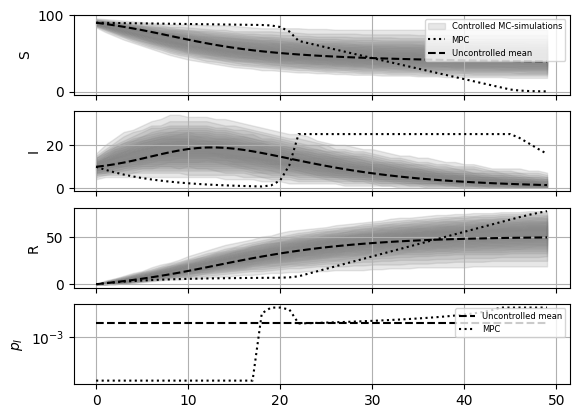

In [ ]:
er_X_list = [np.array([x[0], x[1], x[2]]) for x in er_sims_h]
qr_X_list = [np.array([x[0], x[1], x[2]]) for x in qr_sims_h]
fig, ax = plt.subplots(4)
plot_sim_comparison_SIR(ax, qr_X_list, X_mean, U_mean, qr_X, qr_U, t)

TypeError: plot_sim_comparison() missing 5 required positional arguments: 'X_sim_list', 'X_sol_list', 'U_mean', 'u', and 't'

Text(0.5, 1.0, 'Hospital Capacity under Quantile Regression')

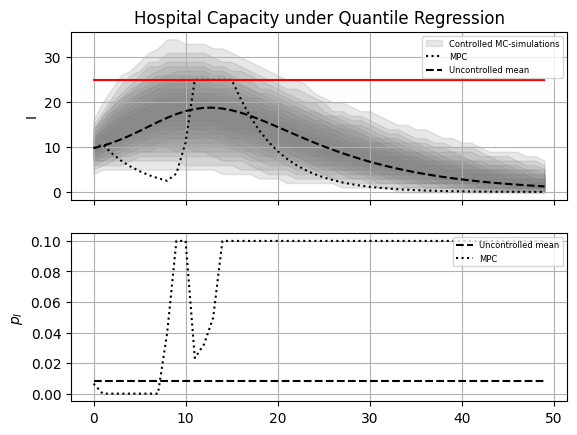

In [ ]:
fig, ax = plt.subplots(2)
plot_sim_comparison_I(ax, qr_X_list, X_mean, U_mean, qr_X, qr_U, t)
ax[0].plot(np.ones(Nt)*I_max, color='red', label='Hospital Capacity')
ax[0].set_title('Hospital Capacity under Quantile Regression')

Text(0.5, 1.0, 'Hospital Capacity under FROLS Regression')

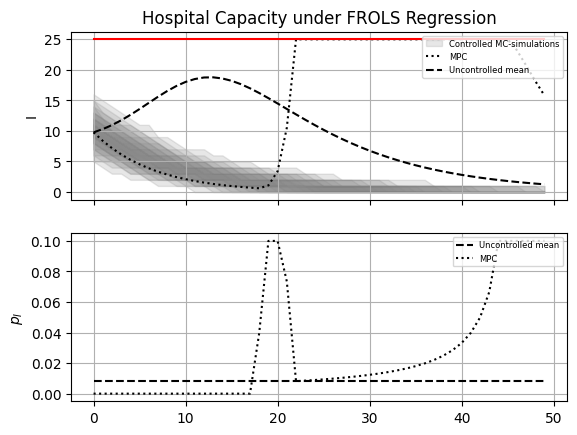

In [ ]:
fig, ax = plt.subplots(2)
plot_sim_comparison_I(ax, er_X_list, X_mean, U_mean, er_X, er_U, t)
ax[0].plot(np.ones(Nt)*I_max, color='red', label='Hospital Capacity')
ax[0].set_title('Hospital Capacity under FROLS Regression')